## <a id='toc1_1_'></a>[Two factor Bergomi Model](#toc0_)

This projects aims at presenting this two factor model and a Monte Carlo procedure to price options and VIX derivatives.

**Table of contents**<a id='toc0_'></a>    
- [Two factor Bergomi Model](#toc1_1_)    
    - [The one factor model](#toc1_1_1_)    
      - [Power-law kernel (rough volatility)](#toc1_1_1_1_)    
      - [Exponential kernel](#toc1_1_1_2_)    
    - [The two factor exponential model](#toc1_1_2_)    
    - [Implementation](#toc1_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[The one factor model](#toc0_)

The two factor Bergomi model relays on forward instantaneous variance quantity. Let's define this quantity by $\xi_t^u = \mathbb{E}(\sigma_u^2 \, | \, \mathcal{F}_t)$ for $t\leq u$, where $\sigma_u^2$ is the instantaneous variance à time $u$.<br>
In the Heston Model, we have : $d(\sigma_t^2) = dV_t = \kappa(\theta - V_t)dt + \omega \sqrt{V_t} dW_t^V$. Hence, we can compute $\xi_t^u$ in this model:
\begin{align*}
    &d(e^{\kappa t}V_t) = \kappa e^{\kappa t} V_t dt + e^{\kappa t} dV_t\\
    \implies &V_u = \theta + e^{-\kappa (u-t)}(V_t - \theta) + \omega \int_t^u e^{\kappa s}\sqrt{V_s}dW_s^V\\
    \implies &\xi_t^u = \theta + e^{-\kappa (u-t)}(V_t - \theta)\\
    \implies &d\xi_t^u = \omega e^{-\kappa (u-t)}\sqrt{V_t}dW_t^V = \omega e^{-\kappa (u-t)}\sqrt{\xi_t^t }dW_t^V
\end{align*}

In the one factor model, we modelize $\xi$ by:
$$
    \dfrac{d\xi_t^u}{\xi_t^u} = K(t,u)dW_t, \, t\leq u
$$
where $K \, : \mathbb{R}_+ \to \mathbb{R}_+$ is a Kernel, chosen homogeneous in time, i.e. $K(t,u) = K(u - t)$. So $\xi$ is modelized by:
\begin{align*}
    &\xi_t^u = \xi_0^u\exp\left( \int_0^t K(u-s) dW_s - \dfrac{1}{2}\int_0^t K(u-s)^2 ds \right)\\
    \implies &\sigma_u^2 = \xi_u^u = \xi_0^u \exp\left( \int_0^u K(u-s) dW_s - \dfrac{1}{2}\int_0^u K(u-s)^2 ds \right)
\end{align*}
Finally, we can write the variance of Variance Swap denoted by $\sigma_T^2(t)$ (historical variance between $t$ and $T$) in term of $\xi$:
$$
    \sigma_T^2(t)=\mathbb{E}\left( \dfrac{1}{T-t} \int_t^T \sigma_u^2 du \, | \, \mathcal{F}_t \right)= \dfrac{1}{T-t}\int_t^T \xi_t^u du.
$$
Below the main kernel to work with.

#### <a id='toc1_1_1_1_'></a>[Power-law kernel (rough volatility)](#toc0_)
Here, $K(t,T)=\nu (T-t)^{H-1/2}$ where $H$ is the Hurst exponent, $H\in (0, \, 1/2)$.<br>
The problem here is that we does not obtain a Markovian representation of $\xi$. Besides, we do not obtain a martingale (blowing up behaviour for short maturities). Thus, we prefere to use Time Shifted Power Law : $K(t,T) = \nu (T-t + \delta)^{H-1/2}$.

#### <a id='toc1_1_1_2_'></a>[Exponential kernel](#toc0_)
We take $K(t,T)=\omega e^{-\kappa T}, \, \omega \geq 0 \, , \kappa > 0$. Then:
$$
     \xi_t^u = \xi_0^u \exp\left( \omega e^{-\kappa(u-t)}X_t - \dfrac{\omega^2}{2}e^{-2\kappa (u-t)}Var(X_t) \right)
$$
where:
\begin{align*}
     &Var(X_t) = \dfrac{1 - e^{-2\kappa t}}{2\kappa}\\
     &X_t = \int_0^t e^{-\kappa (t-s)}dW_s\\
     \implies &dX_t = -\kappa X_tdt + dW_t, \, X_0 = 0.
\end{align*}
Hence $X$ is a Ornstein-Uhlenbeck process.

### <a id='toc1_1_2_'></a>[The two factor exponential model](#toc0_)

Let $\theta \in [0,1], \, \omega \geq 0, \, k_1 > k_2 > 0$. The Kernel is $K(t,T) = K(T-t) = \omega[(1-\theta)e^{-k_1 (T-t)} + \theta e^{-k_2(T-t)}]$. Then:
\begin{align*}
    &\dfrac{d\xi_t^u}{\xi_t^u} = \omega\alpha\left[ (1-\theta)e^{-k_1(u-t)}dW_t^1 + \theta e^{-k_2(u-t)}dW_t^2 \right]\\
    &d \langle W^1, W^2 \rangle_t = \rho_{12}dt
\end{align*}
So we obtain using Ito's formula on $\log \xi_t^u$:
\begin{align*}
    &\xi_t^u = \xi_0^u \exp \left( \omega\alpha[(1-\theta) e^{-k_1(u-t)}X_t^1 + \theta e^{-k_2(u-t)}X_t^2] - \dfrac{\omega^2}{2} \chi (t,u)\right)\\
    &\chi(t,u) = \alpha^2 [(1-\theta)^2 e^{-2k_1(u-t)}Var(X_t^1) + \theta^2e^{-2k_2(u-t)}Var(X_t^2) + 2\theta(1-\theta)e^{-(k_1+k_2)(u-t)}Cov(X_t^1,X_t^2)]\\
    &\alpha = [(1-\theta)^2 + \theta^2 + 2\rho_{12}\theta(1-\theta)]^{-1/2}\\
    &dX_t^i= -k_iX_t^idt + dW_t^i\\
    &Var(X_t^i) = \dfrac{1 - e^{-2k_it}}{2k_i}\\
    &Cov(X_t^1, X_t^2) = \rho_{12}\dfrac{1 - e^{-(k_1+k_2)t}}{k_1+k_2}
\end{align*}
where $\alpha$ is a scale factor so that $\omega$ is the instantaneous variance of $\xi_t^t = V_t$.<br>
Now, the spot can be modelized by (by ometting risk-free rate and with no dividend payment):
\begin{align*}
    &\dfrac{dS_t}{S_t} = \sqrt{\xi_t^t}dW_t^S\\
    \implies &S_t = S_0 \exp\left( \int_0^t \sqrt{\xi_s^s}dW_s - \dfrac{1}{2}\int_0^t \xi_s^s ds \right)\\
    &d \langle W^S, W^1\rangle_t = \rho_{S1}dt\\
    &d \langle W^S, W^2\rangle_t = \rho_{S2}dt
\end{align*}

We take a discrete time grid with step size $\Delta t_i = t_i - t_{i-1}$. Knowing $X_{t_{i-1}}^j, S_{t_{i-1}}$, we have:
$$
  \mathbb{E}(X_{t_i}^j \, | \, X_{t_{i-1}}^j) = e^{-k_j\Delta t_i}X^j_{t_{i-1}}\\
  Var(X_{t_i}^j\, | \, X_{t_{i-1}}^j) = \int_{t_{i-1}}^{t_i}e^{-2k_j(t_i-s)}ds= \dfrac{1 - e^{-2k_j\Delta t_i}}{2k_j} = \sigma^2_{jj}\\
  Cov(X_{t_i}^1, X_{t_i}^2 | X_{t_{i-1}}^1, X_{t_{i-1}}^2) = \rho_{12}\int_{t_{i-1}}^{t_i}e^{-(k_1 + k_2)(t_i-s)}ds = \rho_{12}\dfrac{1 - e^{-(k_1+k_2)\Delta t_i}}{k_1+k_2} = \sigma^2_{12}\\
  Cov(X_{t_i}^j, logS_{t_i} \, | \, X_{t_{i-1}}^j, S_{t_{i-1}}) = \rho_{Sj} \sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\int_{t_{i-1}}^{t_i}e^{-k_j(t_i - s)}ds = \rho_{Sj} \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \dfrac{1 - e^{-k_j\Delta t_i}}{k_j} = \sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\sigma^2_{Sj}\\
  Var(logS_{t_i}\, | \, S_{t_{i-1}}) = \xi_{t_{i-1}}^{t_{i-1}} \Delta t_i = \xi_{t_{i-1}}^{t_{i-1}}\sigma^2_{SS}\\
  \mathbb{E}(logS_{t_i}\, | \, S_{t_{i-1}}) = logS_{t_{i-1}} - \frac{1}{2}\xi_{t_{i-1}}^{t_{i-1}}\Delta t_i
$$
We write:
$$
  \Sigma = \begin{pmatrix}
      \sigma_{11}^2 & \sigma_{12}^2 & \sigma_{S1}^2 \\
      \sigma_{12}^2 & \sigma_{22}^2 & \sigma_{S2}^2 \\
      \sigma_{S1}^2 & \sigma_{S2}^2 & \sigma_{SS}^2
  \end{pmatrix}
$$
The covariance matrix for log spot and both Ornstein-Uhlenbeck. Ussing Cholesky algorithm, we can find $\alpha$ such that $\Sigma = \alpha \alpha^*$. We will use $\alpha$ to correlate standard gaussian random variables.

### <a id='toc1_1_3_'></a>[Implementation for options](#toc0_)

To compute implied volatility from option prices, we will use P. Jäckel method from py_vollib.

In [1]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky
from numpy.polynomial.hermite import hermgauss
import matplotlib.pyplot as plt


from math import exp, sqrt, log, pi, sin, cos, atan, tan
from py_vollib.black_scholes.implied_volatility import implied_volatility

vec_find_vol_rat = np.vectorize(implied_volatility)

In [40]:
def two_factor_bergomi_mc(vov, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, S_0, T, n_steps, N_sims):
    t_grid = np.linspace(0., T, n_steps + 1)
    dt = T/n_steps

    def covar(k_1,k_2,rho,t):
        return rho*(1-np.exp(-(k_1+k_2)*t))/(k_1+k_2)

    def chi_func(k_1,k_2,theta,rho_x1x2,alpha,t): # computes chi(t,t)
        chi = (1-theta)**2*covar(k_1,k_1,1.0,t)+theta**2*covar(k_2,k_2,1.0,t)+\
        2*theta*(1-theta)*covar(k_1,k_2,rho_x1x2,t)

        return alpha**2*chi

    alpha = 1/sqrt((1-theta)**2+theta**2+2*rho_x1x2*theta*(1-theta))
    chi = chi_func(k_1,k_2,theta,rho_x1x2,alpha,t_grid)

    X_1 = np.zeros((n_steps+1,N_sims))
    X_2 = np.zeros((n_steps+1,N_sims))
    X = np.zeros((n_steps+1,N_sims))
    inst_vol = np.zeros((n_steps+1,N_sims))
    logS = np.zeros((n_steps+1,N_sims))
    logS[0] = log(S_0)
    inst_vol[0] = sqrt(xi_0)

    # Variance and covariance that can be computed now
    s_11, s_22, s_12 = covar(k_1,k_1,1,dt), covar(k_2,k_2,1,dt), covar(k_1,k_2,rho_x1x2,dt)
    s_s1 = covar(k_1,0,rho_sx1,dt)
    s_s2 = covar(k_2,0,rho_sx2,dt)
    s_ss = dt

    # Covariance square root lower triangular matrix
    corr_mat = np.array([[s_11, s_12, s_s1], [s_12, s_22, s_s2], [s_s1, s_s2, s_ss]])
    sqr_root = cholesky(corr_mat, lower=True)

    for i in range(n_steps):
        z1, z2, z3 = np.random.normal(size=(3,N_sims))

        # Compute next step for all processes (X^1, X^2, xi, logS)
        X_1[i+1] = X_1[i]*np.exp(-k_1*dt) + sqr_root[0][0] * z1
        X_2[i+1] = X_2[i]*np.exp(-k_2*dt) + (sqr_root[1][0] * z1 + sqr_root[1][1] * z2)
        X[i+1] = alpha*((1-theta)*X_1[i+1] + theta*X_2[i+1])
        inst_vol[i+1] = sqrt(xi_0)*np.exp(vov*X[i+1]/2-vov**2/4*chi[i+1])
        logS[i+1] = logS[i] - 0.5*inst_vol[i]**2*dt + inst_vol[i] * (sqr_root[2][0] * z1 + sqr_root[2][1] * z2 + sqr_root[2][2] * z3)

    return np.exp(logS[-1])

In [41]:
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1, rho_sx2, rho_x1x2 = -0.8, -0.7, 0.7
mat = 1

spot_0 = 100
n_steps = 500
N_sims = 100000

In [42]:
ST = two_factor_bergomi_mc(vov, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)

In [43]:
log_moneyness = np.linspace(-0.6,0.4,100)
strike_array = np.exp(log_moneyness)*spot_0

In [44]:
opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')

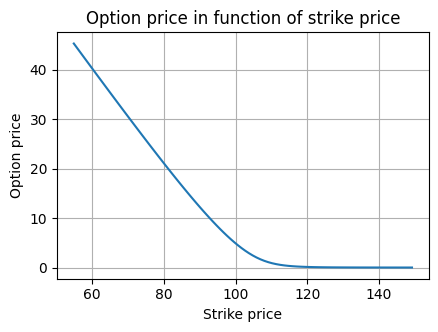

In [45]:
plt.plot(strike_array, opt_price)
plt.xlabel('Strike price')
plt.ylabel('Option price')
plt.title('Option price in function of strike price')
plt.grid()

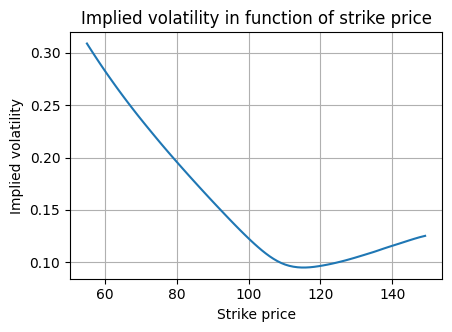

In [46]:
plt.plot(strike_array, iv)
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.title('Implied volatility in function of strike price')
plt.grid()

Let's see impact of vol of vol and the two mean reverting speed.

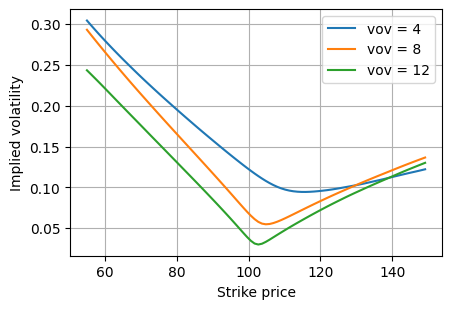

In [47]:
vov = [4,8,12]
for v in vov:
    ST = two_factor_bergomi_mc(v, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='vov = {}'.format(v))
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

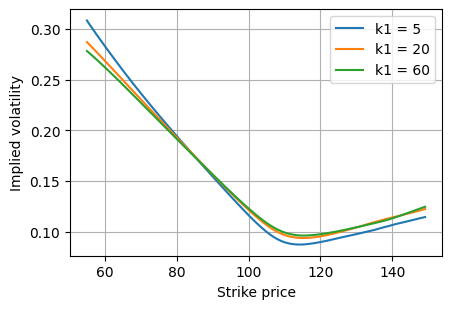

In [48]:
vov = 4
k_1_arr = [5, 20, 60]
for k in k_1_arr:
    ST = two_factor_bergomi_mc(vov, k, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='k1 = {}'.format(k))
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

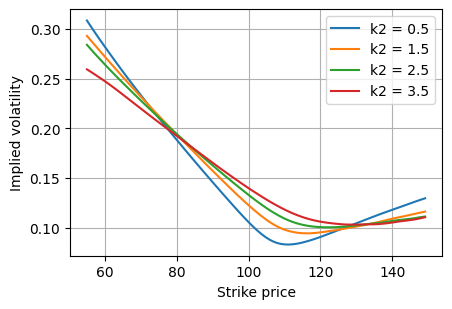

In [49]:
k_2_arr = [0.5, 1.5, 2.5, 3.5]
for k in k_2_arr:
    ST = two_factor_bergomi_mc(vov, k_1, k, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='k2 = {}'.format(k))
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

More vov seems to produce more pronounced smiles. High mean reversion speed $k_1$ seems to have some slight effects whereas low mean reversion speed $k_2$ makes more pronounced smiles fore small values of $k_2$.

### Implementation for options on VIX

VIX is computed using the following formula:
\begin{align*}
    &\text{VIX}_T^2 = \mathbb{E}\left(\dfrac{1}{\tau}\int_T^{T+\tau}\sigma_u^2du \; | \; \mathcal{F}_T \right)\\
    & = \dfrac{1}{\tau}\int_T^{T+\tau} \mathbb{E}(\sigma_u^2 \; | \; \mathcal{F}_T)du\\
    & = \dfrac{1}{\tau}\int_T^{T+\tau} \xi_T^udu. 
\end{align*}
Here, $\tau=30$ days according to CBOE methodology. Obviously we will count only trading days, so a year here is made of 252 days. Let's rewrite this quantity in the two factor exponential model (for $\xi_0$ constant).
\begin{align}
 \text{VIX}_T^2 &= \dfrac{\xi_0}{\tau}\int_T^{T+\tau}\exp(\omega X_T^u - \dfrac{\omega^2}{2}\chi(T, u)) du\\
 &= \dfrac{\xi_0}{\tau}\int_T^{T+\tau} \exp\left(\alpha\omega\left( (1-\theta)e^{-k_1(u-T)}X_T^1 + \theta e^{-k_2(u-T)}X_T^2 \right) - \dfrac{\omega^2}{2} \chi(T,u) \right)du\\
 &= \psi(T, X_T^1, X_T^2)^2.
\end{align}
Hence:
$$
  \text{VIX}_T = \sqrt{\dfrac{\xi_0}{\tau}\int_T^{T+\tau} \exp\left(\alpha\omega\left( (1-\theta)e^{-k_1(u-T)}X_T^1 + \theta e^{-k_2(u-T)}X_T^2 \right) - \dfrac{\omega^2}{2} \chi(T,u) \right)du} = \psi(T, X_T^1, X_T^2)
$$
Since $(X_T^1, X_T^2)$ is a gaussian vector for all $T\geq 0$, $G = \alpha_{\theta}\omega\left( (1-\theta)e^{-k_1(u-T)}X_T^1 + \theta e^{-k_2(u-T)}X_T^2 \right) - \dfrac{\omega^2}{2} \chi(T,u)$ is gaussian.
$$
  G \sim \mathcal{N}(-\dfrac{\omega^2}{2}\chi(T,u), \omega^2\chi(T,u)).
$$
Hence (for $Z\sim \mathcal{N}(0,1))$:
$$
  \begin{align}
    \mathbb{E}[h(\text{VIX}_T^2)] &= \mathbb{E}\left[h\left(\dfrac{\xi_0}{\tau}\int_T^{T+\tau}\exp( -\dfrac{\omega^2}{2}\chi(T,u) + \omega \sqrt{\chi(T,u)}Z)du\right)\right]\\
    &= \mathbb{E}\left[h\left(\dfrac{\xi_0}{\tau}\int_T^{T+\tau}\phi(T,u, Z)du\right)\right] \\
    &\approx \mathbb{E}\left[h\left(\dfrac{\xi_0}{2} (\phi(T,T+\tau, Z) + \phi(T,T, Z))\right)\right]
  \end{align}
$$
We use trapzeoid method to estimate the integral and Gauss-Hermite quadrature ($a$ is the number of points generated by the quadrature method; $x_i, \gamma_i$ are respectively the points and the weights generated bu Gauss-Hermite quadrature with weight function $e^{-x^2}$) to estimate the price of the option on VIX.<br>
$$
  \begin{align}
    \mathbb{E}[h(\text{VIX}_T)] & \approx \mathbb{E}\left[h\left(\sqrt{\dfrac{\xi_0}{2} (\phi(T,T+\tau,Z) + \phi(T,T,Z))}\right)\right]\\
    &\approx \sum_{i=1}^a \gamma_i \dfrac{e^{x_i^2/2}}{\sqrt{2\pi}} h\left(\sqrt{\dfrac{\xi_0}{2} (\phi(T,T+\tau,x_i) + \phi(T,T,x_i))}\right)
  \end{align}
$$
Indeed, the method let us approximate the following integrals:
$$
  \int_{-\infty}^{+\infty} e^{-x^2}f(x)dx.
$$
Since we have a standard gaussian variable, it appears the density function $\dfrac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} = \dfrac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}e^{-x^2}$. That is why we have the term $\dfrac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}$ in the sum.

In [30]:
tau = 30/252
T = [1/12, 2/12, 3/12, 4/12]
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_x1x2 = 0.7
alpha = 1/sqrt((1-theta)**2+theta**2+2*rho_x1x2*theta*(1-theta))

points, weights = hermgauss(50)

def covar(k_1,k_2,rho,t):
  return rho*(1-np.exp(-(k_1+k_2)*t))/(k_1+k_2)

def chi_func(k_1,k_2,theta,rho_x1x2,alpha,t,u): # computes chi(t,u), u >= t
  chi = (1-theta)**2 * np.exp(-2*k_1*(u-t)) * covar(k_1,k_1,1,t) + theta**2 * np.exp(-2*k_2*(u-t)) * covar(k_2,k_2,1,t) + 2 * theta * (1-theta) * np.exp(-(k_1+k_2)*(u-t)) * covar(k_1,k_2,rho_x1x2,t)

  return alpha**2*chi

# Compute exponential
def phi(x,xi_0,vov,k_1,k_2,theta,rho_x1x2,alpha,t,u):
  chi_t_u = chi_func(k_1,k_2,theta,rho_x1x2,alpha,t,u)
  # Trapezoid method
  return (xi_0/tau)*(np.exp(-(vov**2)*0.5 * chi_t_u + vov*np.sqrt(chi_t_u)*x))

# Approximate integral of exponential using trapezoid method betweene t and t+tau
def trapeze(x,xi_0,vov,k_1,k_2,theta,rho_x1x2,alpha,t,tau):
  val_u = phi(x, xi_0, vov, k_1, k_2, theta, rho_x1x2, alpha, t, t+tau)
  val_t = phi(x, xi_0, vov, k_1, k_2, theta, rho_x1x2, alpha, t, t)
  return np.sqrt(0.5*tau*(val_u + val_t))

# Take Hermite Gaussian quadrature points and weights and use them to approximate expectation of VIX (VIX future)
def two_factor_bergomi_VIX(vov, points, weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, mat, tau):
  VIX = trapeze(points, xi_0, vov, k_1, k_2, theta, rho_x1x2, alpha, mat, tau)
  return np.sum(weights * (np.exp((points**2)*0.5) / np.sqrt(2*np.pi)) * VIX)

In [31]:
# Compute VIX future price on different maturities
VIX_T = [two_factor_bergomi_VIX(vov, points, weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, Ti, tau) for Ti in T]

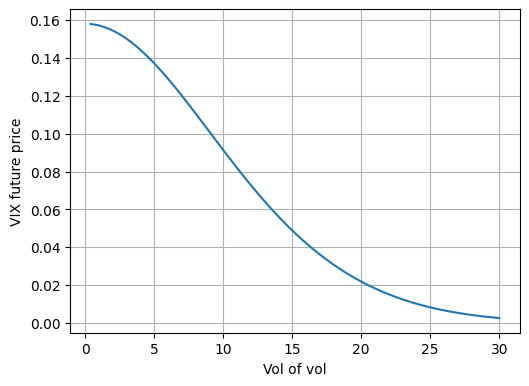

In [32]:
# Plot VIX future price on a single maturity slice, for different vol of vol
vov_array = [i for i in np.linspace(0.4,30,100)]
VIX_T_vov = [two_factor_bergomi_VIX(vovi, points, weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[0], tau) for vovi in vov_array]

plt.plot(vov_array,VIX_T_vov)
plt.xlabel('Vol of vol')
plt.ylabel('VIX future price')
plt.grid()

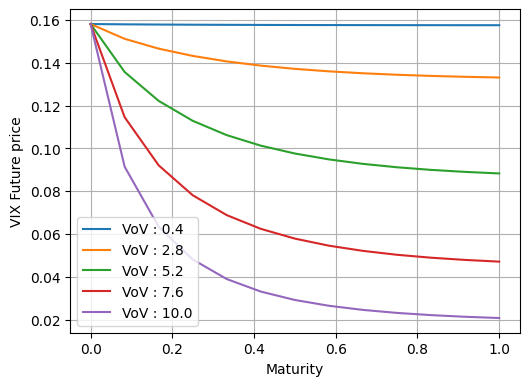

In [33]:
# Plot VIX future price for all defined maturities, in function of vol of vol
vov_array = [i for i in np.linspace(0.4,10,5)]
mat_list = [i/12 for i in range(0,13)]
VIX_vov_mat = [[two_factor_bergomi_VIX(vovi, points, weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, Ti, tau) for Ti in mat_list] for vovi in vov_array]

plt.rcParams["figure.figsize"] = (5.8, 4.2)
for i in range(len(VIX_vov_mat)):
    plt.plot(mat_list, VIX_vov_mat[i], label='VoV : {}'.format(vov_array[i]))
plt.grid()
plt.xlabel("Maturity")
plt.ylabel("VIX Future price")
plt.legend()

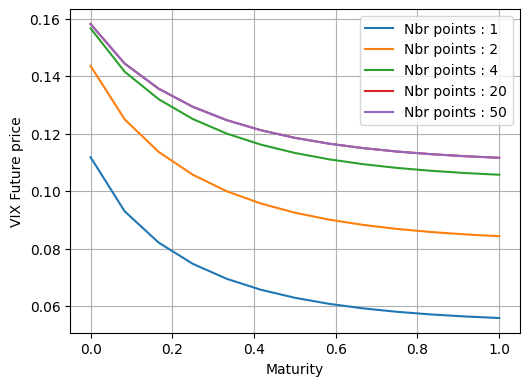

In [34]:
# VIX future price for different degrees in quadrature (more points)
deg_list = [1,2,4,20,50]
quadr = [hermgauss(d) for d in deg_list]
VIX_deg_mat = [[two_factor_bergomi_VIX(vov, pts, w, k_1, k_2, alpha, theta, rho_x1x2, xi_0, Ti, tau) for Ti in mat_list] for pts, w in quadr]

for i in range(len(VIX_deg_mat)):
    plt.plot(mat_list, VIX_deg_mat[i], label='Nbr points : {}'.format(deg_list[i]))
plt.grid()
plt.xlabel("Maturity")
plt.ylabel("VIX Future price")
plt.legend()

Here we see that the quadrature converges quickly to the solution. There is no need for VIX futures to take more that 20 points (curves for 20 and 50 points are the same).<br>
Now let's see how to price VIX call. We take $h(x) = (x - K)_+$ with $K$ the strike (here the strike will be computed using the VIX future price for the same maturity).

In [35]:
lm = np.linspace(-0.2,2.5,50) # log-moneyness
vov=8
points, weights = hermgauss(90)

# strikes for different maturities
strike_array1 = np.exp(lm) * VIX_T[0]
strike_array2 = np.exp(lm) * VIX_T[1]
strike_array3 = np.exp(lm) * VIX_T[2]
strike_array4 = np.exp(lm) * VIX_T[3]

def two_factor_bergomi_VIX_Call(vov, points, weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, mat, tau, K):
  VIX = trapeze(points, xi_0, vov, k_1, k_2, theta, rho_x1x2, alpha, mat, tau)
  # Only change here is the payoff function
  payoff = np.maximum(VIX - K, 0)
  return np.sum(weights * (np.exp((points**2)*0.5) / np.sqrt(2*np.pi)) * payoff)

In [36]:
# Call prices for different maturities
VIX_Call1 = [two_factor_bergomi_VIX_Call(vov,points,weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[0], tau, K) for K in strike_array1]
VIX_Call2 = [two_factor_bergomi_VIX_Call(vov,points,weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[1], tau, K) for K in strike_array2]
VIX_Call3 = [two_factor_bergomi_VIX_Call(vov,points,weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[2], tau, K) for K in strike_array3]
VIX_Call4 = [two_factor_bergomi_VIX_Call(vov,points,weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[3], tau, K) for K in strike_array4]

# Implied vol for calls
iv1 = vec_find_vol_rat(VIX_Call1, VIX_T[0], strike_array1, T[0], 0, 'c')
iv2 = vec_find_vol_rat(VIX_Call2, VIX_T[1], strike_array2, T[1], 0, 'c')
iv3 = vec_find_vol_rat(VIX_Call3, VIX_T[2], strike_array3, T[2], 0, 'c')
iv4 = vec_find_vol_rat(VIX_Call4, VIX_T[3], strike_array4, T[3], 0, 'c')

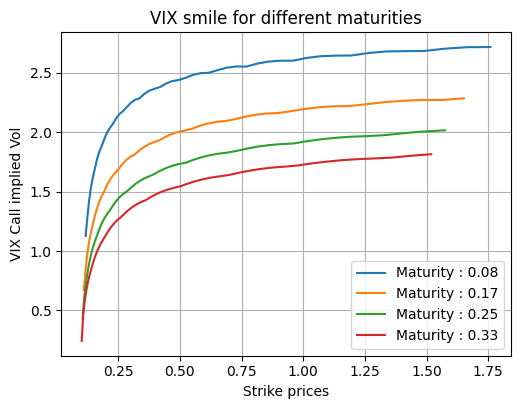

In [37]:
plt.plot(strike_array1,iv1,label="Maturity : {}".format(round(T[0],2)))
plt.plot(strike_array2,iv2,label="Maturity : {}".format(round(T[1],2)))
plt.plot(strike_array3,iv3,label="Maturity : {}".format(round(T[2],2)))
plt.plot(strike_array4,iv4,label="Maturity : {}".format(round(T[3],2)))
plt.xlabel("Strike prices")
plt.ylabel("VIX Call implied Vol")
plt.title("VIX smile for different maturities")
plt.grid()
plt.legend()

And now let's see the impact of vol of vol (vov).

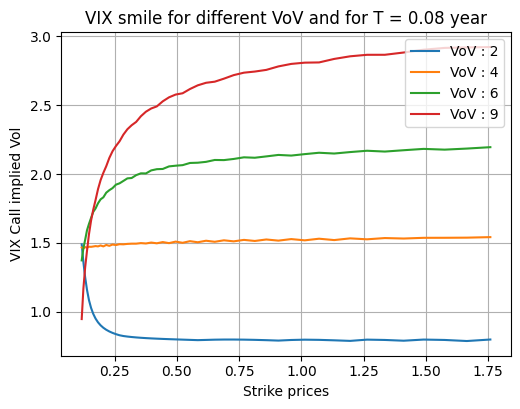

In [38]:
vov_array = [2, 4, 6, 9]
VIX_Call_vov = [[two_factor_bergomi_VIX_Call(vovi,points,weights, k_1, k_2, alpha, theta, rho_x1x2, xi_0, T[0], tau, K) for K in strike_array1] for vovi in vov_array]
iv_vov = [vec_find_vol_rat(VIX_Call, VIX_T[0], strike_array1, T[0], 0, 'c') for VIX_Call in VIX_Call_vov]

for i in range(len(vov_array)):
    plt.plot(strike_array1, iv_vov[i], label="VoV : {}".format(vov_array[i]))
plt.grid()
plt.xlabel("Strike prices")
plt.ylabel("VIX Call implied Vol")
plt.title("VIX smile for different VoV and for T = {} year".format(round(T[0],2)))
plt.legend()

For a small vov, there is an inversion in the trend of the smile (backwardation).